# Judgements Citations

In [1]:
#!pip install networkx

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('../data/judgements/judgement_citations.csv')

In [107]:
df.head()

,source,target,paragraph
0,62016CJ0267,61987CJ0215,N22
1,62016CJ0267,61987CJ0215,N67
2,62016CJ0267,62001CJ0030,N63
3,62016CJ0267,62001CJ0030,N34
4,62016CJ0267,62001CJ0030,N53


In [108]:
len(df)

194933

We create different concatenations in order to retrive information aggregating the nodes

In [113]:
df['relation'] = df['source']+'-'+df['target']
df['unique'] = df['source']+'-'+df['target']+'-'+df['paragraph']
df['citation'] = df['target']+'-'+df['paragraph']

#### Unique paragraph citations  (target-paragraph)

In [78]:
df_citations = df.groupby('citation').agg('count')['source'].reset_index()

In [79]:
df_citations.sort_values(['source'], ascending=False).head(10)

,citation,source
2071,61974CJ0008-N5,47
17313,61989CJ0106-N08,36
21698,61991CJ0267-N16,35
1069,61970CJ0022-N42,34
13558,61986CJ0267-N16,33
22410,61992CJ0091-N26,30
10521,61984CJ0152-N48,25
47866,62001CJ0491-N40,24
47864,62001CJ0491-N38,24
18766,61990CJ0006-N35,24


The most cited [paragraph](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528814213715&uri=CELEX:61974CJ0008)

#### Unique cited cases (target -> source)

In [116]:
df_ = df.groupby(['target','source']).agg('count')['citation'].reset_index()
df_target = df_.groupby('target')['citation'].agg(['count','sum']).reset_index()
df_target.columns = ['target','sources','target_paragraphs']

In [120]:
df_target.sort_values('sources',ascending=False).head(10)

,target,sources,target_paragraphs
3066,61993CJ0415,146,500
397,61974CJ0008,128,341
5198,62002CJ0189,113,338
4179,61998CJ0379,111,279
4654,62000CJ0204,80,177
722,61978CJ0120,74,175
3014,61993CJ0279,73,276
2851,61992CJ0136,72,123
5442,62003CJ0168,70,107
5950,62005CJ0023,70,94


The most cited [case](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528816320947&uri=CELEX:61993CJ0415)

#### Unique relations (source -> target)

In [122]:
#table on relation level
df_relations = df.groupby(['source','relation']).agg('count')['paragraph'].reset_index()

In [121]:
#it is necessary to revise the methodology since it's poossible to check the number of paragrphs in eu-lex, and may not match ith the count method
#df_relations.sort_values(['paragraph'], ascending=False).head(10)

In [128]:
df_source = df_relations.groupby('source')['paragraph'].agg(['count','sum']).reset_index() 
df_source.columns = ['source','targets','source_paragraphs']

In [131]:
df_source.sort_values(['targets'], ascending=False).head(10)

,source,targets,source_paragraphs
6879,62010CJ0539,55,222
7589,62012CJ0382,50,140
6099,62008CJ0384,49,59
5147,62005CJ0341,49,240
8558,62015CJ0072,48,260
6037,62008CJ0280,44,66
6812,62010CJ0416,44,100
5463,62006CJ0413,44,61
5374,62006CJ0268,44,83
5642,62007CJ0208,42,144


The case that cites the [most](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528817250200&uri=CELEX:62010CJ0539)

#### Judgements Metadata

In [153]:
metadata = pd.read_csv('../data/judgements/judgement_metadata_unique.csv')

In [154]:
metadata.head()

,source,ruling_title,chamber,ruling_name,ruling_type,ruling_content,case_label,ecli,lodge_date,document_date,country,judge,advocate
0,61992CJ0379,Judgment of the Court of 14 July 1994,(blank),Criminal proceedings against Matteo Peralta,Reference for a preliminary ruling: Pretura ...,Articles 3 (f); 7; 30; 48; 52; 59; 62; 84 an...,Case C-379/92,ECLI identifier: ECLI:EU:C:1994:296,19/10/1992,14/07/1994,Italy,Grévisse,Lenz
1,61978CJ0091,Judgment of the Court of 13 March 1979,(blank),Hansen GmbH & Co,Check EUR-LEX webpage,Check EUR-LEX webpage,Case 91/78,ECLI identifier: ECLI:EU:C:1979:65,12/04/1978,13/03/1979,Germany,Pescatore,Capotorti
2,61981CJ0017,Judgment of the Court (First Chamber) of 29 Ap...,First Chamber,Pabst & Richarz KG v Hauptzollamt Oldenburg,Reference for a preliminary ruling: Finanzge...,Tax system applicable to spirits,Case 17/81,ECLI identifier: ECLI:EU:C:1982:129,03/02/1981,29/04/1982,Germany,Koopmans,Rozès
3,61996CJ0266,Judgment of the Court (Fifth Chamber) of 18 Ju...,Fifth Chamber,Corsica Ferries France SA v Gruppo Antichi O...,Check EUR-LEX webpage,Check EUR-LEX webpage,Case C-266/96,ECLI identifier: ECLI:EU:C:1998:306,02/08/1996,18/06/1998,Italy,Wathelet,Fennelly
4,62002CJ0025,Judgment of the Court of 9 September 2003,(blank),Katharina Rinke v Ärztekammer Hamburg,Reference for a preliminary ruling: Bundesve...,Equal treatment for men and women - Directiv...,Case C-25/02,ECLI identifier: ECLI:EU:C:2003:435,31/01/2002,09/09/2003,Germany,Jann,(blank)


In [155]:
#writer = pd.ExcelWriter('../data/judgements/judgement_metadata.xlsx')
#metadata.to_excel(writer,'table')
#writer.save()

In [156]:
print(len(metadata),len(metadata['source'].unique()))

11377 11374


In [157]:
#joining the unique cases with the target and source aggregations
df_cases = metadata.merge(df_source, 'left', on='source')
df_cases = df_cases.merge(df_target, 'left', left_on='source', right_on='target')

In [160]:
df_cases[(df_cases['source'] == '61974CJ0008') | (df_cases['source'] == '61993CJ0415') | (df_cases['source'] == '62010CJ0539')]

,source,ruling_title,chamber,ruling_name,ruling_type,ruling_content,case_label,ecli,lodge_date,document_date,country,judge,advocate,targets,source_paragraphs,target,sources,target_paragraphs
1058,62010CJ0539,Judgment of the Court (Third Chamber); 15 Nove...,Third Chamber,Stichting Al-Aqsa v Council of the European Un...,Check EUR-LEX webpage,Check EUR-LEX webpage,Joined Cases C-539/10 P and C-550/10 P,ECLI identifier: ECLI:EU:C:2012:711,18/11/2010,15/11/2012,Netherlands,von Danwitz,Trstenjak,55.0,222.0,62010CJ0539,10.0,36.0
1384,61974CJ0008,Judgment of the Court of 11 July 1974,(blank),Procureur du Roi v Benoît and Gustave Dasson...,Check EUR-LEX webpage,Check EUR-LEX webpage,Case 8-74,ECLI identifier: ECLI:EU:C:1974:82,08/02/1974,11/07/1974,Belgium,Donner,Trabucchi,NaN,NaN,61974CJ0008,128.0,341.0
2122,61993CJ0415,Judgment of the Court of 15 December 1995,(blank),Union royale belge des sociétés de football ...,Reference for a preliminary ruling: Cour d'a...,Freedom of movement for workers - Competitio...,Case C-415/93,ECLI identifier: ECLI:EU:C:1995:463,06/10/1993,15/12/1995,Belgium,Mancini,Lenz,21.0,130.0,61993CJ0415,146.0,500.0


In [161]:
df_cases.to_csv('../data/judgements/judgements.csv', sep=',', header=True, encoding='utf-8',index=False)

In [141]:
#lines = []
#for i in df['source']:
#    lines.append(i)
#
#lines2 = []
#for idx, j in enumerate(lines):
#    j = j+' '+df['target'][idx]
#    lines2.append(j)

In [ ]:
#parsing pandas to lines for networkx to read#parsin 
lines = [j+' '+df['target'][idx] for idx, j in enumerate([i for i in df['source']]) ]

In [9]:
# Using an small graph
g = nx.parse_edgelist(lines, create_using=nx.DiGraph())

In [10]:
# Using an small graph
#g = nx.read_edgelist('orders_general_filter.txt',create_using=nx.DiGraph())

In [11]:
nodes, edges = g.order(), g.size()

In [12]:
avg_deg = float(nodes)/edges

In [13]:
print ('Nodes: {}\nEdges: {}\nAvg Degree: {}'.format(nodes, edges, avg_deg) )

Nodes: 11578
Edges: 58333
Avg Degree: 0.19848113417790958


## Centrality Measures

In [14]:
def centrality_table(centrality_output):
    table = pd.DataFrame([i for i in centrality_output.items()]).sort_values(by=1, ascending=False)
    table.columns = ['Node','Centrality']
    return table

**Degree centrality**  
For particular node is the fraction of nodes it is connected to. We might assume that the node with highest value it's the more connected judgement across the network

In [14]:
degree = nx.degree_centrality(g)
df_degree = centrality_table(degree)
df_degree.head(10)

,Node,Centrality
3502,61993CJ0415,0.014425
9534,62002CJ0189,0.012093
299,61974CJ0008,0.011056
10924,61998CJ0379,0.010797
7536,62000CJ0204,0.009588
7360,62002CJ0255,0.008465
3100,62004CJ0446,0.008379
896,61992CJ0136,0.008206
4287,61999CJ0238,0.008033
8376,62004CJ0344,0.007860


**Closeness centrality**   

Notice that higher values of closeness indicate higher centrality. Literaly we might say that is a "heavy" node, which influences others and it's very in the center of the network

In [15]:
closeness = nx.closeness_centrality(g)
df_closeness = centrality_table(closeness)
df_closeness.head(10)

,Node,Centrality
10329,61981CJ0008,0.145819
299,61974CJ0008,0.140403
8624,61984CJ0152,0.140383
5697,61976CJ0033,0.136915
3502,61993CJ0415,0.135670
6897,61975CJ0043,0.134770
8126,61983CJ0014,0.133693
438,61977CJ0106,0.133375
7503,61978CJ0120,0.133174
1842,61984CJ0222,0.130741


**Communicability**   
How good the nodes can reach others

In [16]:
#not for diricted graph
#communicability = nx.communicability(g)
#df_communicability = centrality_summary(communicability)
#df_communicability.head(10)

**Betweenness centrality**   
The highest betweenness the highest control over the network, because more information will pass through that node

In [15]:
betweenness = nx.betweenness_centrality(g)

In [16]:
df_betweenness = centrality_table(betweenness)
df_betweenness.head(10)

,Node,Centrality
1485,62004CJ0344,0.003539
11422,61993CJ0415,0.002531
9215,62002CJ0189,0.002485
11377,62010CJ0188,0.002444
64,62003CJ0210,0.002405
2966,62006CJ0268,0.002087
6675,62010CJ0617,0.002083
9903,62001CJ0491,0.002046
2987,62005CJ0341,0.001964
11511,62007CJ0169,0.001865


In [20]:
tradeoff = 0.002

In [21]:
len(betweenness.keys())

11578

In [22]:
top_80 = [i for i in betweenness.keys()][0:80]

In [23]:
betweenness_top = {k:betweenness[k] for k in top_80 if k in betweenness} #the variable has the same name but it's just the top

In [24]:
highbetw = {key if value > tradeoff else None for key, value in betweenness_top.items()}
normbetw = {key if value <= tradeoff else None for key, value in betweenness_top.items()}

In [25]:
subgraphs = [highbetw,normbetw]
colors = ["lightgreen", "skyblue"] #more.. "skyblue", "mistyrose", "aliceblue"]

In [26]:
def find_color(node):
    for subgraph in subgraphs:
        if node in subgraph:
            return colors[subgraphs.index(subgraph)]
    return "ghostwhite"

In [35]:
#subgraph of 100 nodes with higher betweenes
#{k:g[k] for k in top_80 if k in g}

In [34]:
#for i in g:
#    print (i)

In [27]:
node_colors = [find_color(node) for node in g.nodes()]

In [36]:
#plt.figure(figsize=(16, 8))
#nx.draw(g, node_color=node_colors, width=0.8)

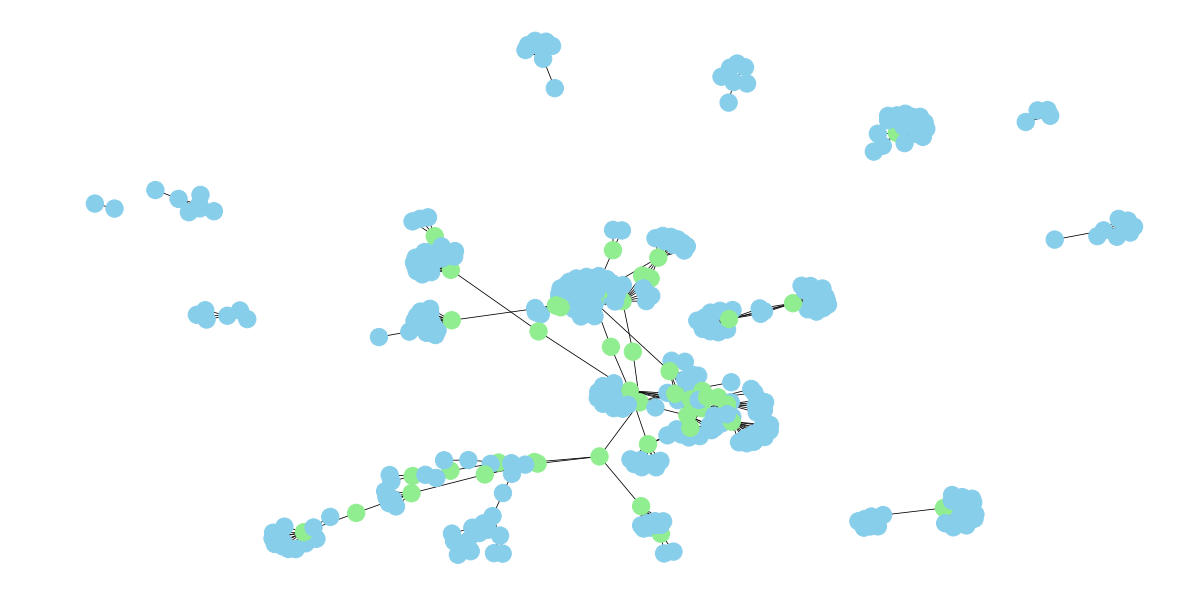

In [42]:
plt.figure(figsize=(16, 8))
nx.draw(g, node_color=node_colors, width=0.8)

In [43]:
pagerank = nx.pagerank(g, alpha=0.9)

In [28]:
# Create function to retrieve nodes and its degrees
def degree_table(degree_vector):
    d_table = pd.DataFrame()
    nodes, degrees = [], []
    for node, degree in degree_vector:
        nodes.append(node)
        degrees.append(degree)
    
    d_table['nodes'] = nodes
    d_table['degrees'] = degrees
    return d_table

#### Degree Frequency

In [29]:
degrees = degree_table(g.degree()) #also in_degree(), g.out_degree()
plot_degrees = degrees.groupby('degrees').count().head(10)

Text(0,0.5,'Number of nodes')

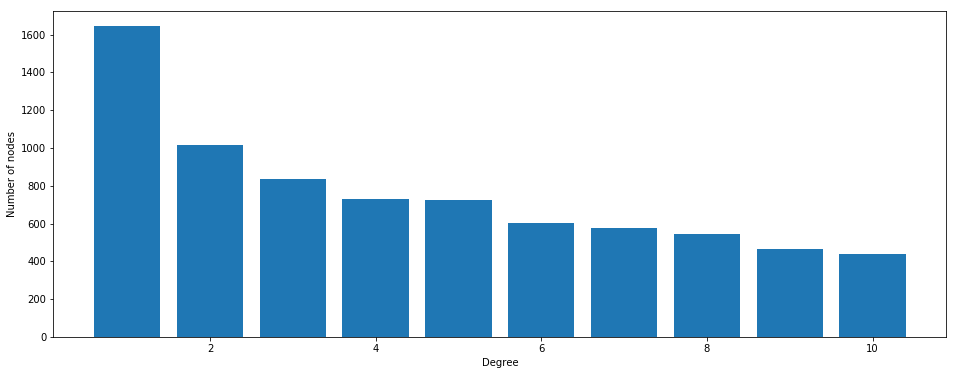

In [30]:
plt.figure(figsize=(16, 6))
plt.bar(plot_degrees.index, plot_degrees['nodes']) # degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

**Eccentricity**   
Of a node v is the maximum distance from v to all other nodes in G.

The **diameter** is the maximum eccentricity.

In [51]:
#nx.diameter(g)

The **radius** is the minimum eccentricity.

In [53]:
#nx.radius(g)

The **center** is the set of nodes with eccentricity equal to radius.

In [ ]:
#nx.center(g)

The **dijkstra** method to find the shortest path between two nodes 

In [ ]:
#dijkstra = nx.dijkstra_path(g,#'node','node')